In [1]:
import pandas as pd

In [2]:
from datetime import datetime

In [3]:
#helper function to read and clean data

In [4]:
def read_and_clean():
    """A helper function to read in data from the csv file and do some cleaning/parsing for price and date"""
    
    # read in csv data, parse dates, set index to Trip ID
    trips_df = pd.read_csv("./data/trips_gdrive.csv", sep=',', header=0, parse_dates=['Date'], index_col=['Trip ID'])
    
    # remove dollar sign from price and change data type to int
    trips_df['Item Dollars'] = (trips_df['Item Dollars'].str.strip('$').astype(int))
    
    return trips_df

In [5]:
#First Function

In [6]:
def retailer_affinity(focus_brand):
    """Given a brand, returns the strongest retailer affinity relative to other brands"""

    # call helper function to read and clean csv file
    trips_df = read_and_clean()

    # if the brand name passed in exists in the dataframe
    if str(focus_brand) in trips_df['Parent Brand'].values:

        # then select rows where the brand column matches the one we are looking for
        trips_focus_brand = (trips_df[trips_df['Parent Brand'] == focus_brand])

    else:

        # otherwise, return an error message
        return "Sorry, not a brand we are tracking at this time."

    # only select the Retailer and Item Dollars columns
    trips_focus_brand = trips_focus_brand[['Retailer', 'Item Dollars']]

    # sum up Item Dollar values and group by Retailer, then sort by the sum of Item Dollar values with biggest sum at the top
    most_selling_retailer = trips_focus_brand.groupby('Retailer').aggregate(sum).sort_values('Item Dollars', ascending=False)

    # returns the value of the index of the first row, which is the retailer name
    return most_selling_retailer.index[0]

In [7]:
retailer_affinity('Monster')

'Walmart'

In [9]:
#Second Function

In [10]:
def top_buying_brand():
    """Returns the brand with the top buying rate ($ spent per household)"""

    trips_df = read_and_clean()

    # add up all the dollars spent for each brand
    dollars_spent = trips_df[['Parent Brand', 'Item Dollars']].groupby('Parent Brand').aggregate(sum)

    # count up the unique number of households (User ID column) that made purchases from each brand
    num_households = trips_df[['Parent Brand', 'User ID']].groupby('Parent Brand')['User ID'].nunique()
    
    #add unique number of households as a column in dollars_spent 
    dollars_spent['num_households'] = num_households
    
    # divide the $ spent by the number of households for each brand
    buying_rate = dollars_spent['Item Dollars']/dollars_spent['num_households']
    
    #return the value of the index at the top of the list, which is the name of the brand with the highest buying rate
    return buying_rate

In [11]:
df = top_buying_brand()
print df

Parent Brand
5 Hour Energy    17.193659
Monster          14.378125
Red Bull         15.324259
Rockstar         10.309256
dtype: float64


In [12]:
type(df)

pandas.core.series.Series

In [17]:
df.iloc[0:4]

Parent Brand
5 Hour Energy    17.193659
Monster          14.378125
Red Bull         15.324259
Rockstar         10.309256
dtype: float64

In [16]:
df.index.values

array(['5 Hour Energy', 'Monster', 'Red Bull', 'Rockstar'], dtype=object)

In [145]:
#Third Function

In [76]:
def count_hhs(brand=None, retailer=None, start_date=None, end_date=None):
    """Given inputs, returns the number of households that matches the inputs"""
    
    # read in the csv file and clean/parse it
    trips_df = read_and_clean()
    
    # check if a brand name has been passed in and exists in the Parent Brand column
    if brand and brand in trips_df['Parent Brand'].values:

        # if so, select the rows with the brand name
        trips_df = (trips_df[trips_df['Parent Brand'] == brand])
    
    # check if a retailer name has been passed in and exists in the Retailer column
    if retailer and retailer in trips_df['Retailer'].values:
        
        trips_df = (trips_df[trips_df['Retailer'] == retailer])
    
    # if start date exists
    if start_date:
        
        # filter out rows with dates that are less than the start date
        trips_df = (trips_df[trips_df['Date'] >= datetime.strptime(start_date, '%Y-%m-%d')])
    
    # if end date exists
    if end_date:
        
        # filter out rows with dates that are greater than the end date
        trips_df = (trips_df[trips_df['Date'] <= datetime.strptime(end_date, '%Y-%m-%d')])
        
    # return the number of unique occurrences of User ID's
    return trips_df['User ID'].nunique()

In [77]:
count_hhs(retailer='Kroger', brand='Rockstar', start_date="2014-05-03", end_date='2014-05-30')

100

In [50]:
df = read_and_clean()

In [61]:
datetime.strptime("2014-05-03", '%Y-%m-%d')

datetime.datetime(2014, 5, 3, 0, 0)

In [84]:
df["User ID"].nunique()

10495

In [7]:
import matplotlib.pyplot as plt

In [15]:
plt.plot?

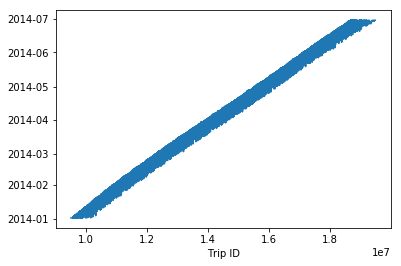

In [8]:
df['Date'].plot()